In [1]:
import pandas as pd

In [2]:
df_hate_speech = pd.read_csv("2019-05-28_portuguese_hate_speech_hierarchical_classification.csv",delimiter=",")
df_hate_speech

,text,Hate.speech,Sexism,Body,Racism,Ideology,Homophobia,Origin,Religion,Health,...,Thin.women,Arabic,East.europeans,Africans,South.Americans,Brazilians,Migrants,Homossexuals,Thin.people,Ageing
0,"""não come mel, morde marimbondo""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"não tem pinto, tem orgulho !",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Não vê essa merda de Crepúsculo! Pra isso temo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"não da tapa na bundinha, da cotovelada nas cos...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,o diminutivo INHO não acompanha a trajetória d...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,Na minha sala só tem viado e sapatão e a cois...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5664,PARABENS SAPATÃO SDDS @attomiter https://t.co/...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5665,RT @toquedeveludo: Agora um poema:\nEu sou sap...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5666,O mundo das sapatao é mais ligado do que eu im...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Nuvem de palavras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beatriz.souza.silva\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


True

OSError: [Errno 22] Invalid argument: 'hate_speech_wordcloud.png'

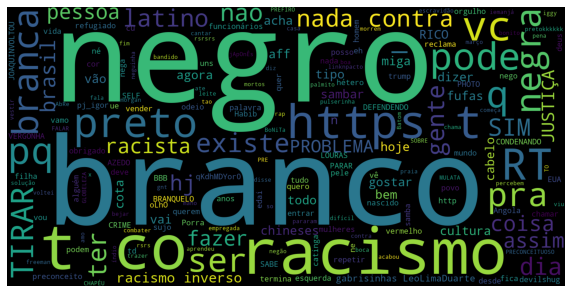

In [5]:
# concatenar as palavras
all_comments = " ".join(text for text in df_hate_speech["text"] if len(text)>2)

all_hashtags = ""
for comment in df_hate_speech["text"]:
    for word in comment.split(" "):
        if word != "":
            if(word[0] == "#"):
                all_hashtags += " " + word

df_hs = df_hate_speech[df_hate_speech["Hate.speech"]==1]
hatespeech_comments = " ".join(text for text in df_hs["text"] if len(text)>2)

df_sx = df_hate_speech[df_hate_speech["Sexism"]==1]
sexism_comments = " ".join(text for text in df_sx["text"] if len(text)>2)

df_rc = df_hate_speech[df_hate_speech["Racism"]==1]
racism_comments = " ".join(text for text in df_rc["text"] if len(text)>2)

df_hm = df_hate_speech[df_hate_speech["Homophobia"]==1]
homophobia_comments = " ".join(text for text in df_hm["text"] if len(text)>2)

df_bd = df_hate_speech[df_hate_speech["Body"]==1]
body_comments = " ".join(text for text in df_bd["text"] if len(text)>2)

# lista de stopword
#stopwords = set(STOPWORDS)
#stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords.words('portuguese'),
                      background_color="black",
                      width=1600, height=800).generate(racism_comments)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("hate_speech_wordcloud.png")